In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [5]:
df = pd.read_csv('../data/student_performance_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [42]:
def plot_features_num_regression(df, target_col="", columns=[], umbral_corr=0, pvalue=None):
    """
    Función para analizar correlaciones numéricas y graficar pairplots.

    Params:
        df (pd.DataFrame): DataFrame de entrada.
        target_col (str): Columna objetivo para calcular correlaciones.
        columns (list[str]): Columnas a evaluar (si está vacío, selecciona numéricas). Por defecto [].
        umbral_corr (float): Umbral absoluto de correlación. Por defecto 0.
        pvalue (float): Nivel de significancia para el p-valor (opcional). Por defecto None.

    Returns:
        list[str]: Columnas seleccionadas que cumplen con los criterios.
    """
    
    # Validación del DataFrame
    if not isinstance(df, pd.DataFrame):
        raise ValueError("El argumento 'df' debe ser un DataFrame de pandas válido.")
    
    # Validación de que 'target_col' sea obligatorio
    if not target_col:
        raise ValueError("Debes proporcionar un 'target_col' válido para calcular correlaciones.")
    
    # Verificamos si 'target_col' es una columna válida en el dataframe
    if target_col and target_col not in df.columns:
        raise ValueError(f"La columna indicada como 'target_col': {target_col} no está en el DataFrame.")

    # Verificamos si la columna 'target_col' es numérica
    if target_col and not pd.api.types.is_numeric_dtype(df[target_col]):
        raise ValueError(f"La columna indicada como 'target_col': {target_col} no es numérica.")
    
    # Si 'columns' está vacío, usamos todas las columnas numéricas excepto 'target_col'
    if not columns:
        columns = df.select_dtypes(include=['number']).columns.tolist()
        if target_col in columns:
            columns.remove(target_col)

    # sino, es decir, si 'columns' no está vacío, validamos que las columnas existan y sean numéricas
    else:
        invalid_cols = [col for col in columns if col not in df.columns]
        if invalid_cols:
            raise ValueError(f"Las siguientes columnas no están en el DataFrame: {invalid_cols}")
    
        non_numeric_cols = [col for col in columns if not pd.api.types.is_numeric_dtype(df[col])]
        if non_numeric_cols:
            raise ValueError(f"Las siguientes columnas no son numéricas: {non_numeric_cols}")

    # Validación del umbral de correlacion 'umbral_corr'
    if not isinstance(umbral_corr, (int, float)) or not 0 <= umbral_corr <= 1:
        raise ValueError("El argumento 'umbral_corr' debe ser un número entre 0 y 1.")
    
    # Validación del valor 'P-Value'    
    if pvalue is not None:
        if not isinstance(pvalue, (int, float)) or not 0 <= pvalue <= 1:
            raise ValueError("El argumento 'pvalue' debe ser un número entre 0 y 1, o 'None'.")

    
    # CORRELACION
    # Correlación absoluta de las columnas vs al target
    corr  = np.abs(df.corr()[target_col]).sort_values(ascending=False)

    # Columnas que superan el umbral de correlacion, excluyendo a la columna 'target_col'
    selected_columns = corr[(corr > umbral_corr) & (corr.index != target_col)].index.tolist()

    # Si se proporciona un p-value, verificamos significancia estadística
    if pvalue is not None:
        significant_columns = []  # Lista para guardar las columnas significativas
        for col in selected_columns:
            corr, p_val = stats.pearsonr(df[col], df[target_col])
            if p_val <= pvalue:
                significant_columns.append(col)
        selected_columns = significant_columns  # Actualizamos con las significativas

    # Validación de los resultados de la correlación
    if not selected_columns:
        print("No se encontraron columnas que cumplan con los criterios de correlación y p-valor.")
        return None
    
    # PAIRPLOTS
    # Incluir siempre target_col en cada gráfico
    columns_to_plot = [target_col] + selected_columns

    # Dividir en grupos de máximo 5 columnas (incluyendo target_col)
    num_groups = (len(columns_to_plot) - 1) // 4 + 1  # Grupos de 4 columnas + target

    for i in range(num_groups):
        # Seleccionar un grupo de columnas
        subset = columns_to_plot[:1] + columns_to_plot[1 + i*4:1 + (i+1)*4]
    
        # Generar el pairplot
        sns.pairplot(df[subset], diag_kind="kde", corner=True)
        plt.show()

    return selected_columns

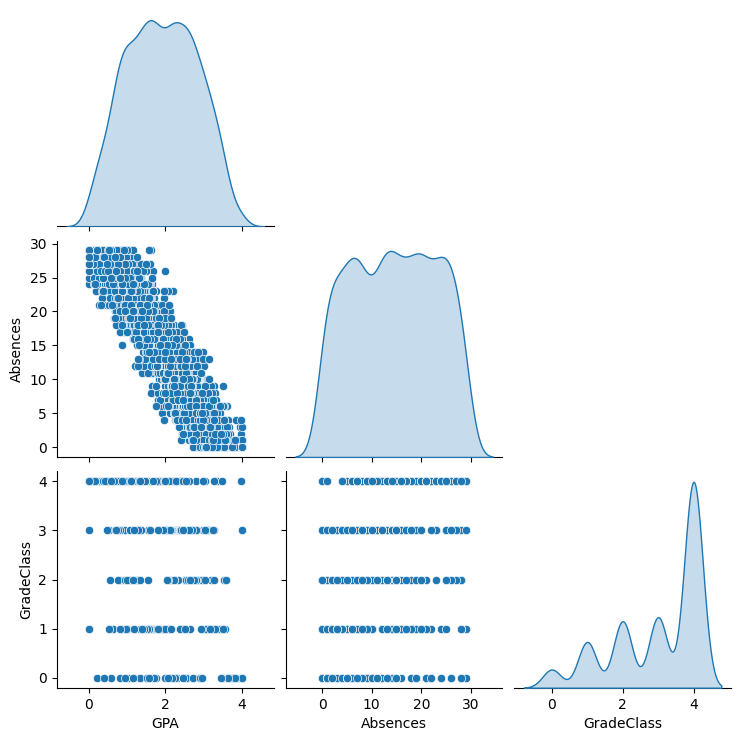

In [43]:
plot_features_num_regression(df, target_col="GPA", umbral_corr=0.2, pvalue=0.05)